# Problem 1
**Answer a) code, discretizing using McCormack**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationMacCormack:
    """
    HeatEquationMacCormack
    ----------------------
    A solver for the 1-D heat equation using a predictor–corrector
    (MacCormack-style) discretization scheme.

    Governing PDE:
        ∂h/∂t = k ∂²h/∂x²

    Domain:
        0 <= x <= L

    Boundary conditions:
        h(0, t) = 0
        h(L, t) = sin(pi * t / 10)

    Initial condition:
        h(x, 0) = 0

    Parameters
    ----------
    L : float
        Length of the spatial domain (default 100).
    dx : float
        Spatial step size (default 1).
    dt : float
        Time step size (default 0.01).
    k : float
        Diffusion coefficient (default 1.0).

    Attributes
    ----------
    x : ndarray
        Discrete spatial grid points.
    h : ndarray
        Current solution vector at all spatial points.
    Nx : int
        Number of spatial grid points.

    Methods
    -------
    boundary_conditions(t):
        Apply boundary conditions at time t.
    step(t):
        Perform one MacCormack predictor–corrector step.
    run(T):
        Run simulation up to time T and return solution.
    plot_time_snapshots(times):
        Plot solution at specified times.
    plot_varying_k(ks, T):
        Plot solution at fixed time T for different k values.
    """

    def __init__(self, L=100, dx=1, dt=0.01, k=50):
        # Store parameters
        self.L = L
        self.dx = dx
        self.dt = dt
        self.k = k

        # Create spatial grid
        self.x = np.arange(0, L+dx, dx)
        self.Nx = len(self.x)

        # Initialize solution with zeros (initial condition)
        self.h = np.zeros(self.Nx)

    def boundary_conditions(self, t):
        """
        Apply boundary conditions at time t:
        - Left boundary fixed at 0
        - Right boundary oscillates as sin(pi * t / 10)
        """
        self.h[0] = 0
        self.h[-1] = np.sin(np.pi * t / 10)

    def step(self, t):
        """
        Perform one MacCormack step:
        Predictor: forward Euler using current h
        Corrector: average of predictor and corrected update
        """
        h = self.h.copy()

        # Predictor step
        h_pred = h.copy()
        for i in range(1, self.Nx-1):
            h_pred[i] = h[i] + self.dt * self.k * (h[i+1] - 2*h[i] + h[i-1]) / (self.dx**2)

        # Apply boundary conditions to predictor
        h_pred[0] = 0
        h_pred[-1] = np.sin(np.pi * t / 10)

        # Corrector step
        h_corr = h.copy()
        for i in range(1, self.Nx-1):
            h_corr[i] = 0.5 * (h[i] + h_pred[i] +
                               self.dt * self.k * (h_pred[i+1] - 2*h_pred[i] + h_pred[i-1]) / (self.dx**2))

        # Apply boundary conditions to corrector
        h_corr[0] = 0
        h_corr[-1] = np.sin(np.pi * t / 10)

        # Update solution
        self.h = h_corr

    def run(self, T):
        """
        Run simulation up to time T.
        Returns the solution h(x, T).
        """
        steps = int(T / self.dt)
        t = 0
        for _ in range(steps):
            self.step(t)
            t += self.dt
        return self.h

    def plot_time_snapshots(self, times):
        """
        Plot solution at specified times.
        Each run starts from the initial condition.
        """
        plt.figure(figsize=(8,6))
        for T in times:
            self.h[:] = 0  # reset to initial condition
            sol = self.run(T)
            plt.plot(self.x, sol, label=f"t={T}")
        plt.xlabel("x")
        plt.ylabel("h(x,t)")
        plt.title("Heat Equation with MacCormack Scheme")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_varying_k(self, ks, T=20):
        """
        Plot solution at fixed time T for different diffusion coefficients k.
        """
        plt.figure(figsize=(8,6))
        for k in ks:
            self.k = k
            self.h[:] = 0  # reset to initial condition
            sol = self.run(T)
            plt.plot(self.x, sol, label=f"k={k}")
        plt.xlabel("x")
        plt.ylabel("h(x,T)")
        plt.title(f"Heat Equation at t={T} for varying k")
        plt.legend()
        plt.grid(True)
        plt.show()



**answer b) Solving the equation with k=50 t=0,4,8,12,16,20,30,50**

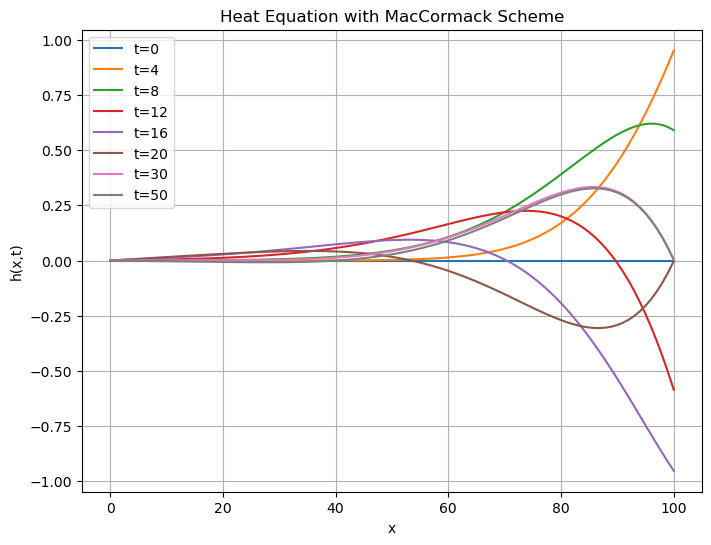

In [14]:

solver = HeatEquationMacCormack()
solver.plot_time_snapshots([0,4,8,12,16,20,30,50])


Modified code for explicit scheme, $$k\cdot dt/dx^2<0.5$$
Resting soluyion a each h(80,t)
**answer c)**


In [15]:
import numpy as np
import matplotlib.pyplot as plt

class HeatEquationMacCormack:
    def __init__(self, L=100, dx=1, dt=0.01, k=1.0):
        self.L = L
        self.dx = dx
        self.dt = dt
        self.k = k
        self.x = np.arange(0, L+dx, dx)
        self.Nx = len(self.x)
        self.h = np.zeros(self.Nx)
        self.t = 0.0

    def step(self):
        h = self.h.copy()

        # Predictor
        h_pred = h.copy()
        for i in range(1, self.Nx-1):
            h_pred[i] = h[i] + self.dt * self.k * (h[i+1] - 2*h[i] + h[i-1]) / (self.dx**2)
        h_pred[0] = 0
        h_pred[-1] = np.sin(np.pi * self.t / 10)

        # Corrector
        h_corr = h.copy()
        for i in range(1, self.Nx-1):
            h_corr[i] = 0.5*(h[i] + h_pred[i] +
                             self.dt * self.k * (h_pred[i+1] - 2*h_pred[i] + h_pred[i-1]) / (self.dx**2))
        h_corr[0] = 0
        h_corr[-1] = np.sin(np.pi * self.t / 10)

        self.h = h_corr
        self.t += self.dt

    def run_record_point(self, T, x_point=80):
        """Run simulation up to time T and record h(x_point,t)."""
        steps = int(T / self.dt)
        values = []
        times = []
        idx = np.argmin(np.abs(self.x - x_point))  # nearest grid index
        self.h[:] = 0
        self.t = 0.0
        for _ in range(steps):
            self.step()
            values.append(self.h[idx])
            times.append(self.t)
        return np.array(times), np.array(values)

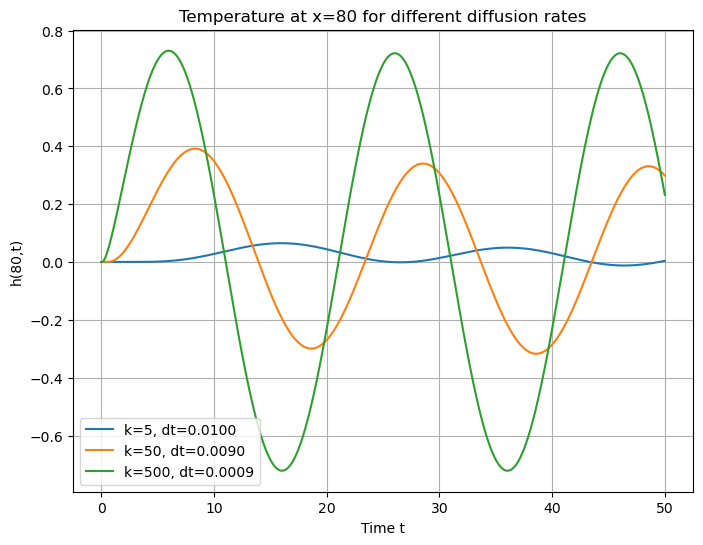

In [16]:
L, dx = 100, 1
T = 50

plt.figure(figsize=(8,6))
for k in [5, 50, 500]:
    # Adjust dt for stability: dt < dx^2/(2k)
    dt = min(0.01, dx**2/(2*k) * 0.9)  # safety factor
    solver = HeatEquationMacCormack(L=L, dx=dx, dt=dt, k=k)
    times, values = solver.run_record_point(T, x_point=80)
    plt.plot(times, values, label=f"k={k}, dt={dt:.4f}")

plt.xlabel("Time t")
plt.ylabel("h(80,t)")
plt.title("Temperature at x=80 for different diffusion rates")
plt.legend()
plt.grid(True)
plt.show()


**answer d)**

$$
\
\frac{\partial h}{\partial t} = k \frac{\partial^2 h}{\partial x^2}
\
$$


### Diffusion coefficient \(k\)
- **Meaning:** \(k\) (thermal diffusivity) measures how quickly heat spreads through the medium.
- **Units:** length² / time (e.g., m²/s).
- **Effect:**
  - Large \(k\): heat diffuses rapidly, boundary oscillations at \(x=100\) penetrate quickly into the rod.
  - Small$\(k\): heat diffuses slowly, oscillations remain localized near the boundary.

### Time \(t\)
- **Meaning:** evolution variable that tracks how the temperature distribution changes.
- **Effect:**
  - Small \(t\): solution is close to the initial condition (mostly zero except near the boundary).
  - Large \(t\): diffusion has had more time to spread, so oscillations at the boundary influence deeper into the rod.

---

## Combined Effect
- **\(k\)** controls the *rate* of diffusion (how fast heat spreads).
- **\(t\)** controls the *extent* of diffusion (how long heat has spread).

At \(x=80\), \(t \in [0,50]\):
- With \(k=5\): oscillations from the boundary take longer to reach \(x=80\).
- With \(k=50\): oscillations reach \(x=80\) faster and with more amplitude.
- With \(k=500\): diffusion is so strong that oscillations at \(x=100\) quickly spread across the rod, so \(h(80,t)\) closely follows the boundary condition.



##  Numerical Stability
For explicit schemes, stability requires:


$$\frac{k \cdot \Delta t}{\Delta x^2} < \frac{1}{2}$$


- If \(k\) is large, you must reduce \(\Delta t\) to avoid divergence.
- Example: for \(k=500\), we should choose a smaller time step than for \(k=5\).

In [17]:
import numpy as np
import pandas as pd
import plotly.express as px

class HeatEquationMacCormackDF:
    """
    Solver for the 1-D heat equation using MacCormack scheme.
    Results stored in a Pandas DataFrame for analysis and animation.
    """

    def __init__(self, L=100, dx=1, dt=0.01, k=50):
        self.L = L
        self.dx = dx
        self.dt = dt
        self.k = k
        self.x = np.arange(0, L+dx, dx)
        self.Nx = len(self.x)
        self.h = np.zeros(self.Nx)
        self.t = 0.0

    def step(self):
        h = self.h.copy()
        h_pred = h.copy()
        for i in range(1, self.Nx-1):
            h_pred[i] = h[i] + self.dt * self.k * (h[i+1] - 2*h[i] + h[i-1]) / (self.dx**2)
        h_pred[0] = 0
        h_pred[-1] = np.sin(np.pi * self.t / 10)

        h_corr = h.copy()
        for i in range(1, self.Nx-1):
            h_corr[i] = 0.5*(h[i] + h_pred[i] +
                             self.dt * self.k * (h_pred[i+1] - 2*h_pred[i] + h_pred[i-1]) / (self.dx**2))
        h_corr[0] = 0
        h_corr[-1] = np.sin(np.pi * self.t / 10)

        self.h = h_corr
        self.t += self.dt

    def run_to_dataframe(self, T=10, sample_interval=100):
        steps = int(T / self.dt)
        records = []
        for step in range(steps):
            self.step()
            if step % sample_interval == 0:
                # Only save values for x in [95,100]
                mask = (self.x >= 95) & (self.x <= 100)
                for xi, hi in zip(self.x[mask], self.h[mask]):
                    records.append({"time": self.t, "x": xi, "h": hi})
        return pd.DataFrame(records)

    def animate(self, T=50, sample_interval=100):
        df = self.run_to_dataframe(T, sample_interval)
        fig = px.line(df, x="x", y="h", animation_frame="time",
                      range_x=[95,100],  # restrict x-axis
                      title="Heat Equation Evolution (MacCormack, x=95..100)",
                      labels={"h":"h(x,t)", "x":"x"})
        fig.show()


# Example usage:
solver = HeatEquationMacCormackDF(k=1.0)
solver.animate(T=50, sample_interval=50)